In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean_ingr_dataset.csv")
df.head()

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,ingredients
0,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat..."
1,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0,"['water', 'butylene glycol', 'sodium pca', 'wa..."
2,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,"['water', 'caprylic/capric triglyceride', 'hyd..."
3,Cleanser,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,"['water', 'glycerin', 'stearic acid', 'myristi..."
4,Cleanser,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,"['mannitol', 'sodium cocoyl glycinate', 'sodiu..."


In [3]:
columns = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

In [4]:
skin_mapping = {
    'Dry': 'D',
    'Oily': 'O',
    'Sensitive': 'S',
    'Combination': 'C',
    'Normal': 'N'
}

In [5]:
skintype = df.apply(
    lambda row: ','.join([skin_mapping[col] for col in columns if row[col] == 1])
    or 'NO',
    axis=1
)

In [6]:
df['skintype'] = skintype

In [7]:
df_umap = pd.read_csv("umap_dataset.csv")
df_umap = df_umap[['name','umap_comp_1', 'umap_comp_2', 'umap_comp_3']]
df_umap

,name,umap_comp_1,umap_comp_2,umap_comp_3
0,GENIUS Ultimate Anti-Aging Melting Cleanser,-3.462126,-1.281736,-0.404654
1,Hydrating Essence Toner,-1.403818,-1.107007,2.699228
2,Multi-Perfecting Detoxifying Exfoliator,-2.836174,-1.236796,0.511404
3,Treatment Cleansing Foam,-4.772723,-1.295502,-0.937622
4,Treatment Enzyme Peel,-3.255179,-1.451754,-0.393702
...,...,...,...,...
1421,Rejuvenating Serum,-4.510498,0.762030,-0.430926
1422,Resurfacing Serum,-4.384932,0.618290,-0.187240
1423,Luminous Deep Hydration Firming Serum,-2.438087,-1.731397,-0.235419
1424,Snow Mushroom Water Serum,-0.874482,-0.834789,1.930345


In [8]:
df2 = df.drop(['ingredients', 'skintype'], axis = 1)
df2

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive
0,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0
1,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0
2,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0
3,Cleanser,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0
4,Cleanser,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1421,Treatment,TATA HARPER,Rejuvenating Serum,110,3.7,1,1,1,1,1
1422,Treatment,TATA HARPER,Resurfacing Serum,88,4.2,1,1,1,1,1
1423,Treatment,TATCHA,Luminous Deep Hydration Firming Serum,95,3.8,0,0,0,0,0
1424,Treatment,VOLITION BEAUTY,Snow Mushroom Water Serum,62,4.7,1,1,1,1,1


In [9]:
X = df2.copy()

In [ ]:
X3 = df2.copy()

In [ ]:
X3 = X3.merge(df_umap, on='name')

In [10]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Label'] = le.fit_transform(X['Label'])

X['brand'] = le.fit_transform(X['brand'])



In [11]:
X

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive
0,0,0,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0
1,0,0,Hydrating Essence Toner,25,4.4,0,0,0,0,0
2,0,0,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0
3,0,1,Treatment Cleansing Foam,50,4.5,1,0,1,1,0
4,0,1,Treatment Enzyme Peel,60,4.7,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1421,5,103,Rejuvenating Serum,110,3.7,1,1,1,1,1
1422,5,103,Resurfacing Serum,88,4.2,1,1,1,1,1
1423,5,104,Luminous Deep Hydration Firming Serum,95,3.8,0,0,0,0,0
1424,5,110,Snow Mushroom Water Serum,62,4.7,1,1,1,1,1


In [12]:
X = X.merge(df_umap, on='name')

In [ ]:
X3 = X3.drop('name', axis=1)

In [ ]:
X3.head()

In [ ]:
X

In [13]:
X = X.drop('name', axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
colsminmax = ['price', 'rank']
mm = MinMaxScaler()
X_mm = mm.fit_transform(X[colsminmax])
X[colsminmax] = X_mm


In [16]:
X.head()

,Label,brand,price,rank,Combination,Dry,Normal,Oily,Sensitive,umap_comp_1,umap_comp_2,umap_comp_3
0,0,0,0.095368,0.82,0,0,0,0,0,-3.462126,-1.281736,-0.404654
1,0,0,0.059946,0.88,0,0,0,0,0,-1.403818,-1.107007,2.699228
2,0,0,0.095368,0.92,0,0,0,0,0,-2.836174,-1.236796,0.511404
3,0,1,0.128065,0.90,1,0,1,1,0,-4.772723,-1.295502,-0.937622
4,0,1,0.155313,0.94,1,1,1,1,1,-3.255179,-1.451754,-0.393702


In [ ]:
X2 = X.drop(['brand'], axis = 1)

In [15]:
from sklearn.cluster import KMeans

In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

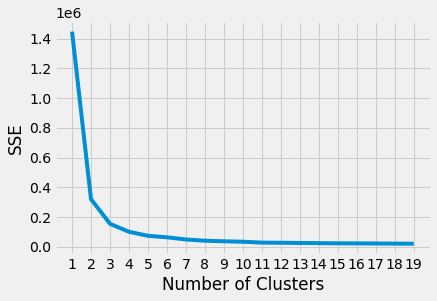

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
import sklearn
from sklearn.metrics import silhouette_score, silhouette_samples

In [87]:
param_grid = {
    'n_clusters': range(2, 20),  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'max_iter': [100, 300, 500]  # Maximum number of iterations
}

In [88]:
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

In [90]:
grid_search.fit(X)
best_estimator = grid_search.best_estimator_
best_estimator.fit(X)
silhouette_avg = silhouette_score(X, best_estimator.labels_)
best_params = grid_search.best_params_

In [22]:
kmeans = KMeans()

In [60]:
X

,Label,brand,price,rank,Combination,Dry,Normal,Oily,Sensitive,umap_comp_1,umap_comp_2,umap_comp_3
0,0,0,0.095368,0.82,0,0,0,0,0,-3.462126,-1.281736,-0.404654
1,0,0,0.059946,0.88,0,0,0,0,0,-1.403818,-1.107007,2.699228
2,0,0,0.095368,0.92,0,0,0,0,0,-2.836174,-1.236796,0.511404
3,0,1,0.128065,0.90,1,0,1,1,0,-4.772723,-1.295502,-0.937622
4,0,1,0.155313,0.94,1,1,1,1,1,-3.255179,-1.451754,-0.393702
...,...,...,...,...,...,...,...,...,...,...,...,...
1421,5,103,0.291553,0.74,1,1,1,1,1,-4.510498,0.762030,-0.430926
1422,5,103,0.231608,0.84,1,1,1,1,1,-4.384932,0.618290,-0.187240
1423,5,104,0.250681,0.76,0,0,0,0,0,-2.438087,-1.731397,-0.235419
1424,5,110,0.160763,0.94,1,1,1,1,1,-0.874482,-0.834789,1.930345


In [113]:
grid_search.fit(X)
best_estimator = grid_search.best_estimator_
best_estimator.fit(X)
silhouette_avg = silhouette_score(X, best_estimator.labels_)
best_params = grid_search.best_params_
# Print the Silhouette Score
print("Silhouette Score:", silhouette_avg)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_) 

Silhouette Score: 0.33212382620412995
Best Parameters:  {'init': 'k-means++', 'max_iter': 500, 'n_clusters': 19}


For n_clusters = 2 The average silhouette_score is : 0.6460536788187691
For n_clusters = 3 The average silhouette_score is : 0.5824872486794447
For n_clusters = 4 The average silhouette_score is : 0.5261519994438126
For n_clusters = 5 The average silhouette_score is : 0.49942158511088547
For n_clusters = 6 The average silhouette_score is : 0.4617497954533814
For n_clusters = 7 The average silhouette_score is : 0.43758857677533386
For n_clusters = 8 The average silhouette_score is : 0.4244892548436869
For n_clusters = 9 The average silhouette_score is : 0.4135837080974458
For n_clusters = 10 The average silhouette_score is : 0.42738015686009245
For n_clusters = 11 The average silhouette_score is : 0.39851893579842446
For n_clusters = 12 The average silhouette_score is : 0.3641077421594232
For n_clusters = 13 The average silhouette_score is : 0.35940335730778034
For n_clusters = 14 The average silhouette_score is : 0.3507680329073066
For n_clusters = 15 The average silhouette_score is : 

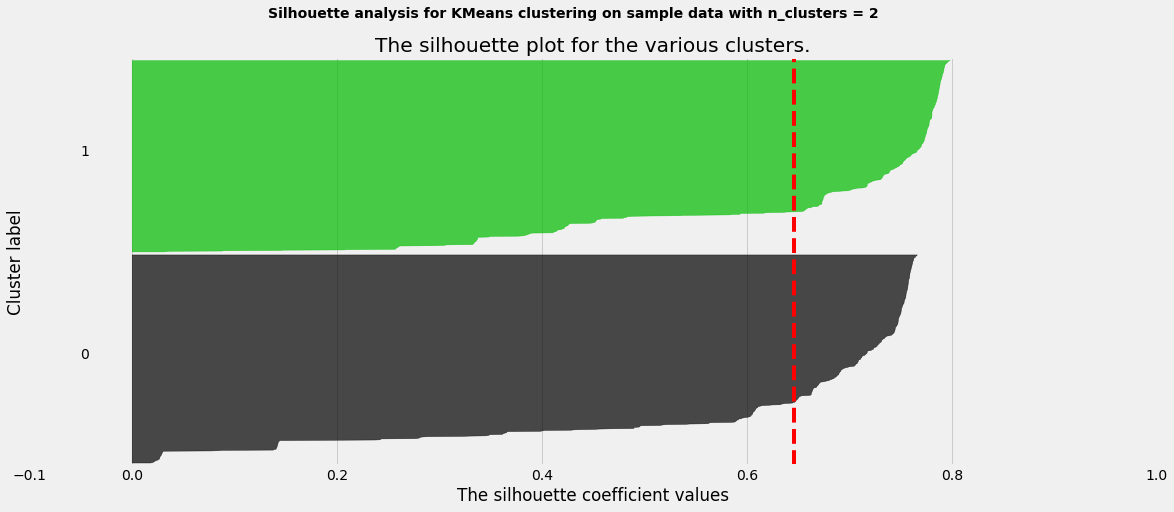

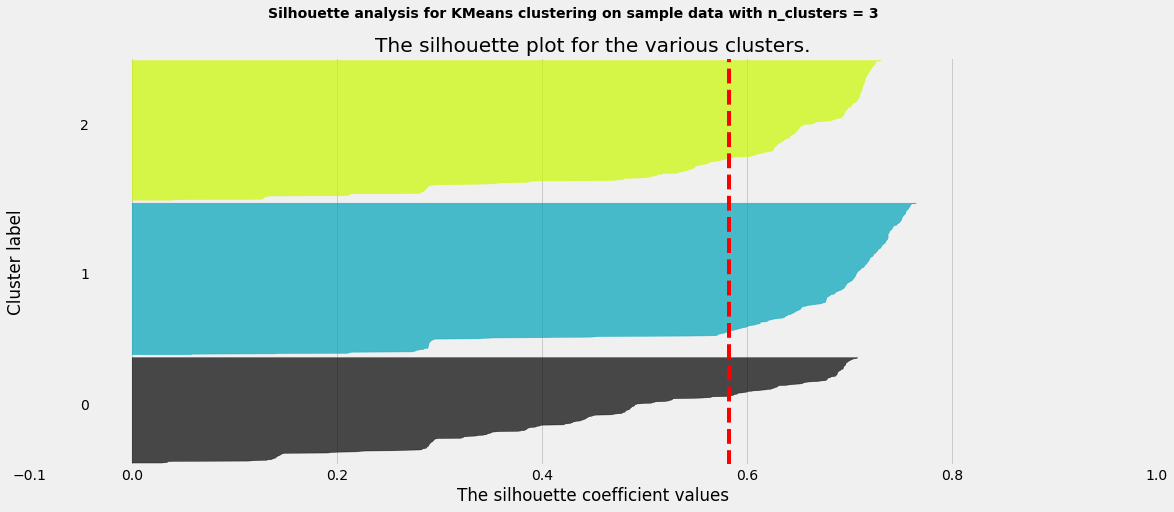

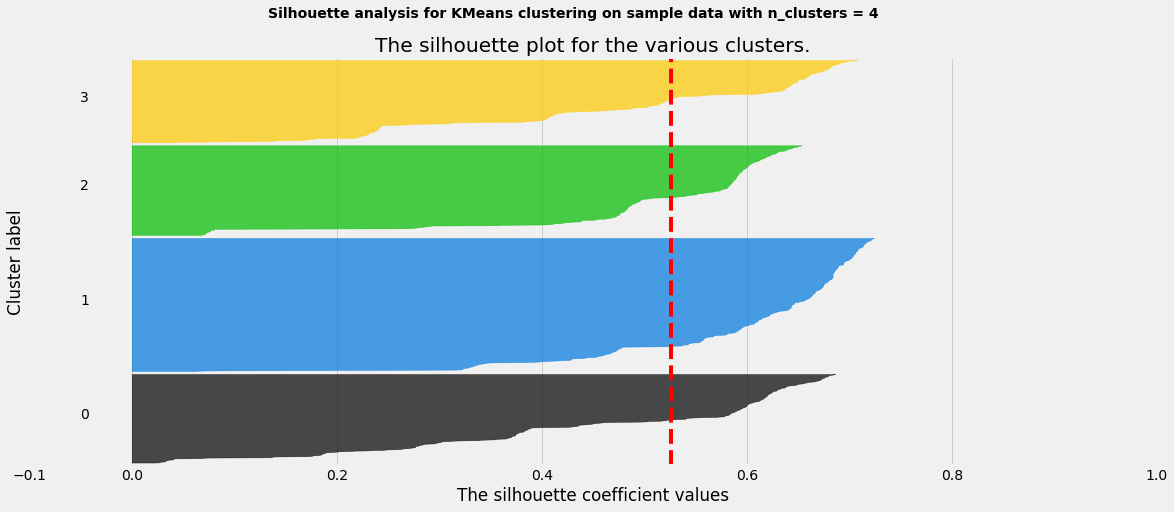

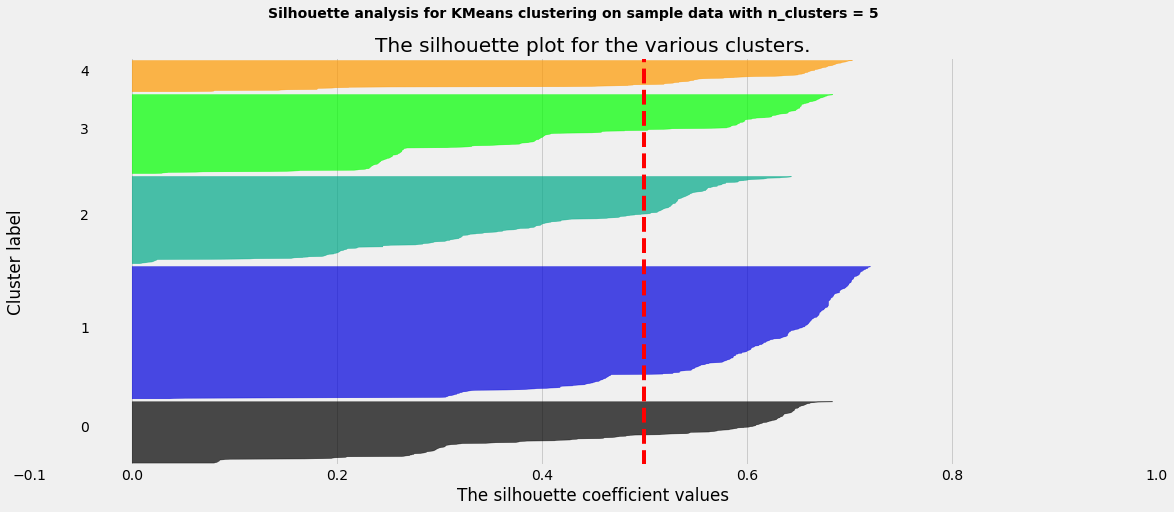

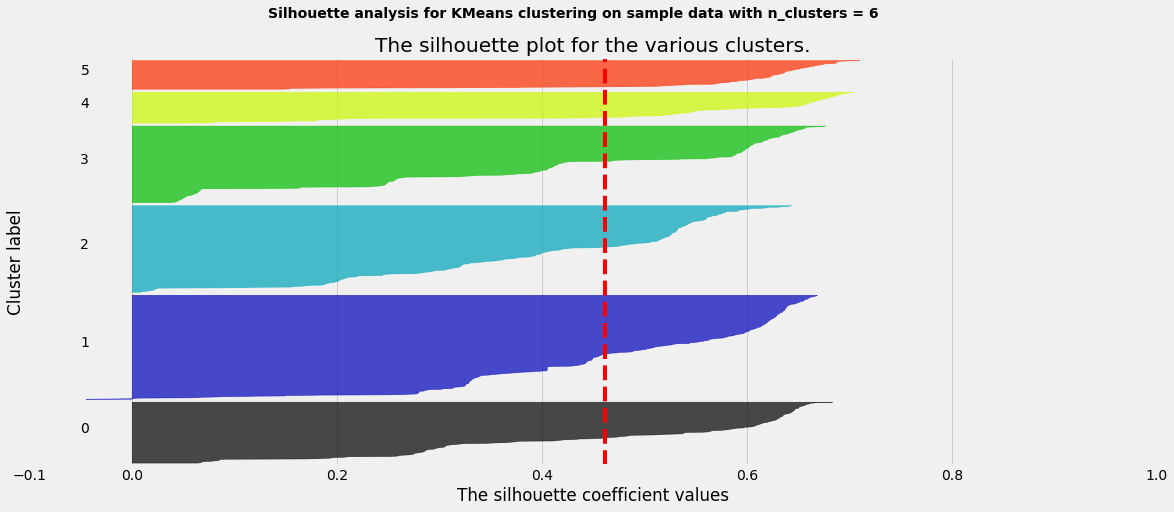

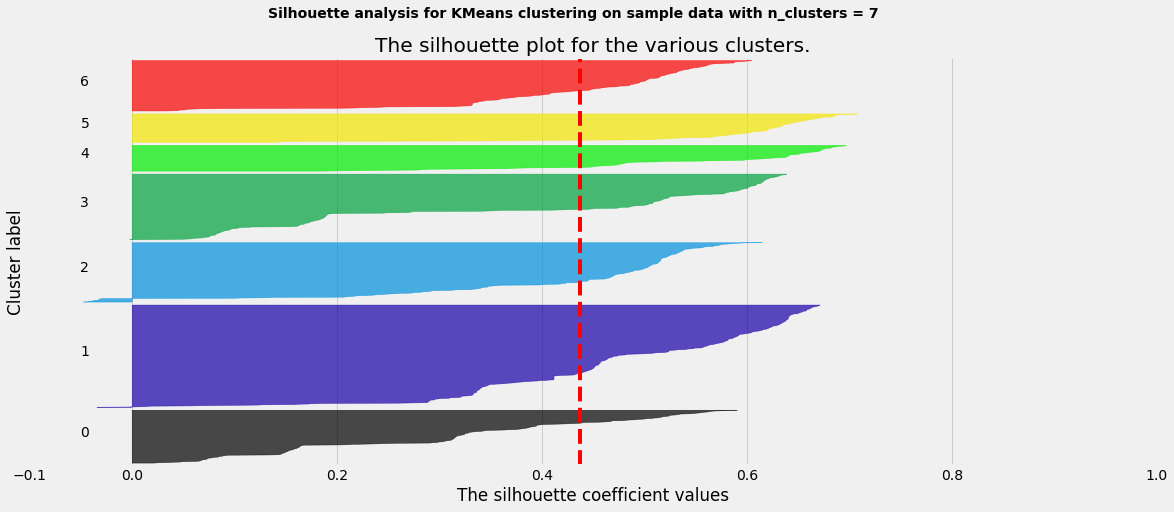

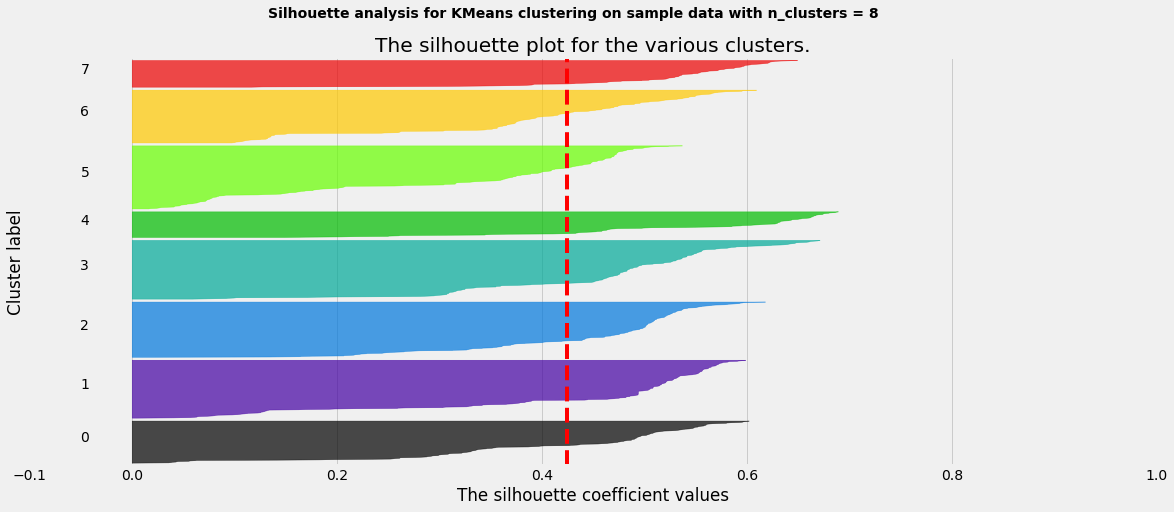

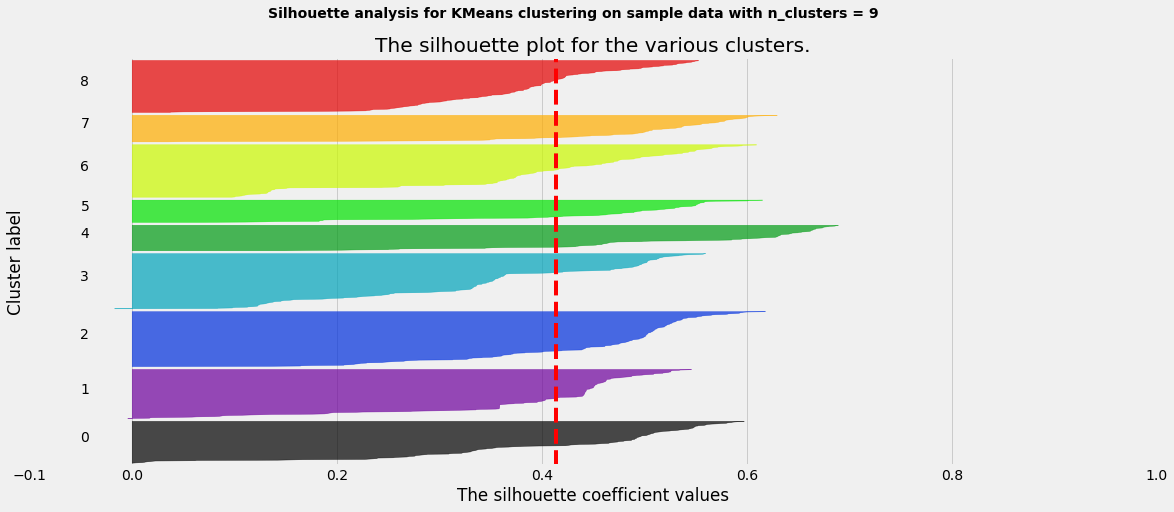

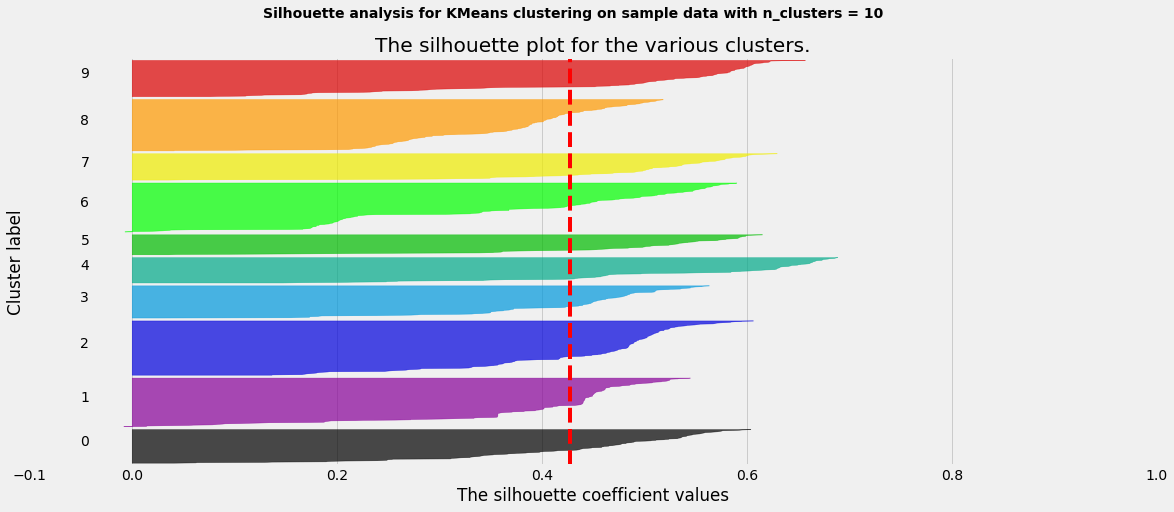

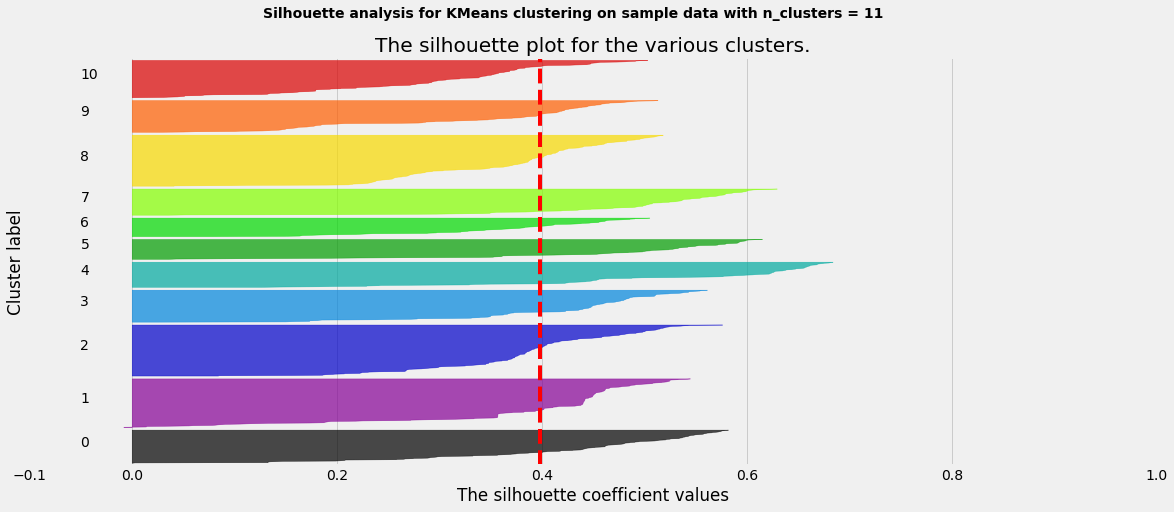

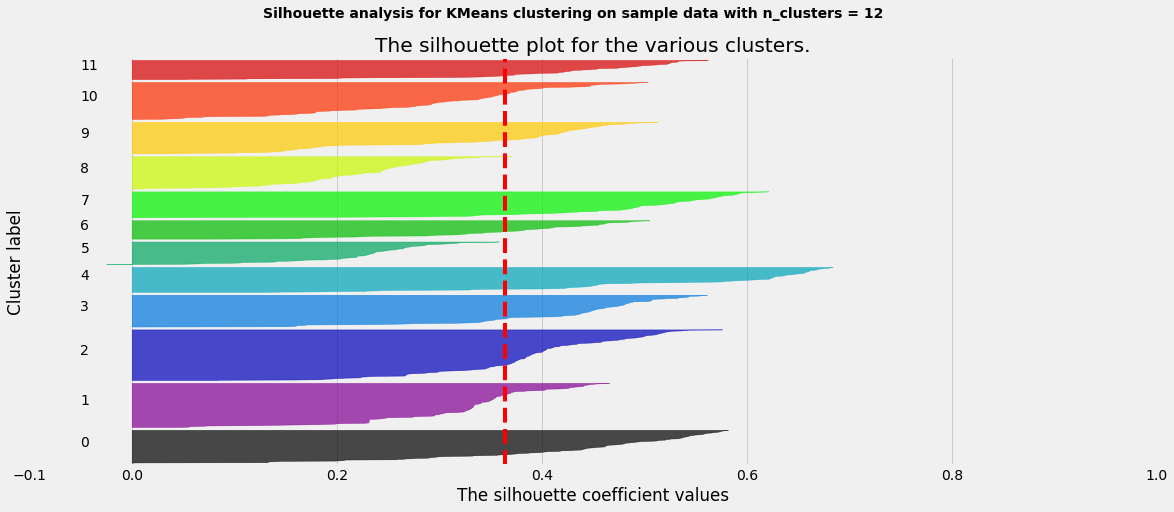

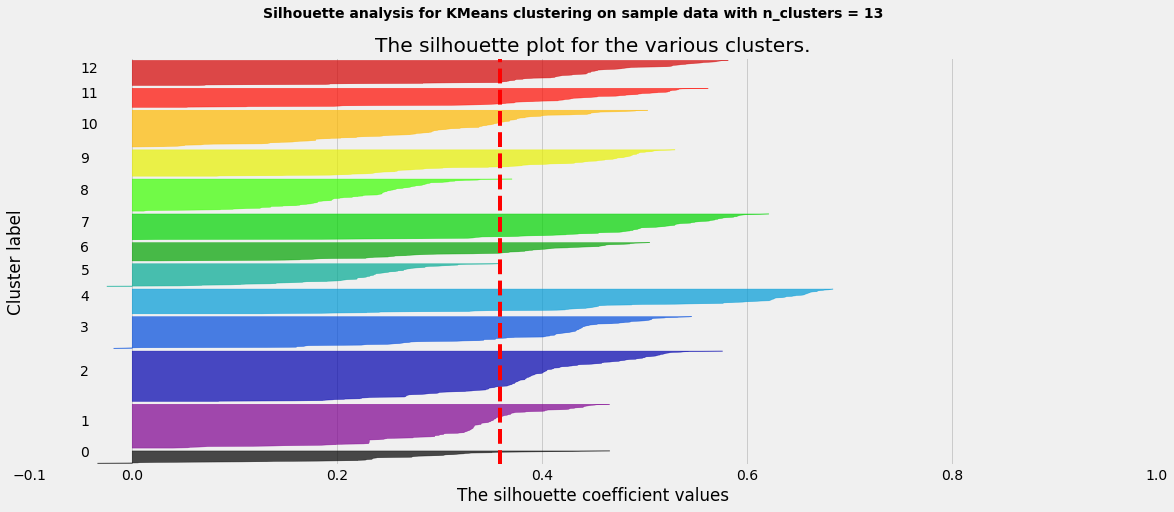

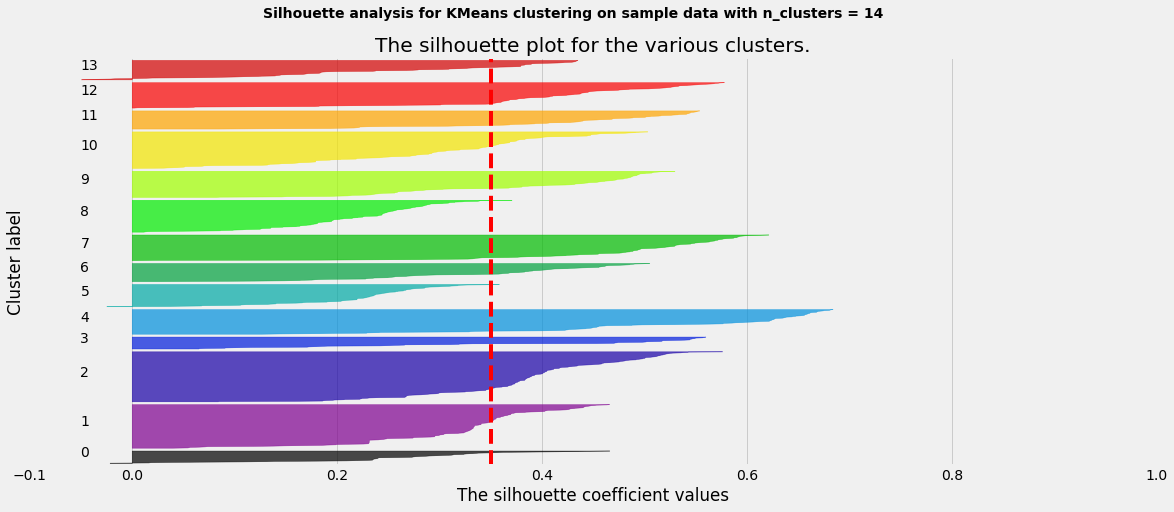

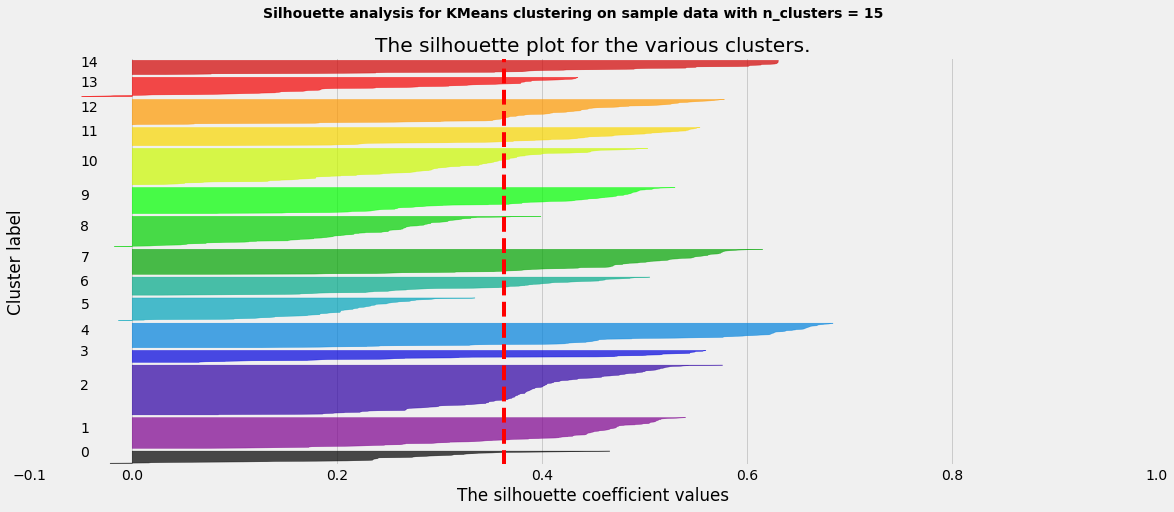

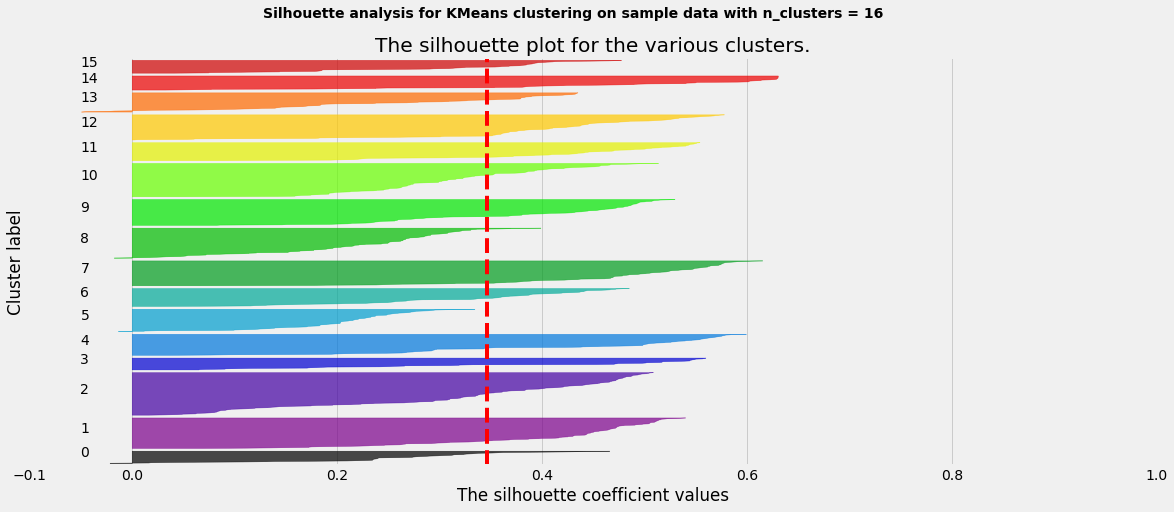

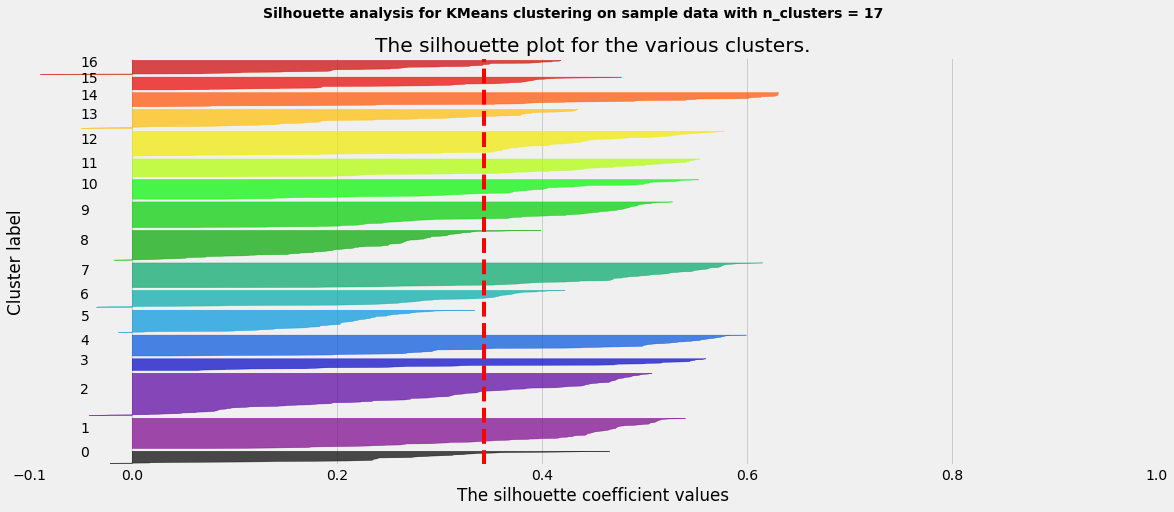

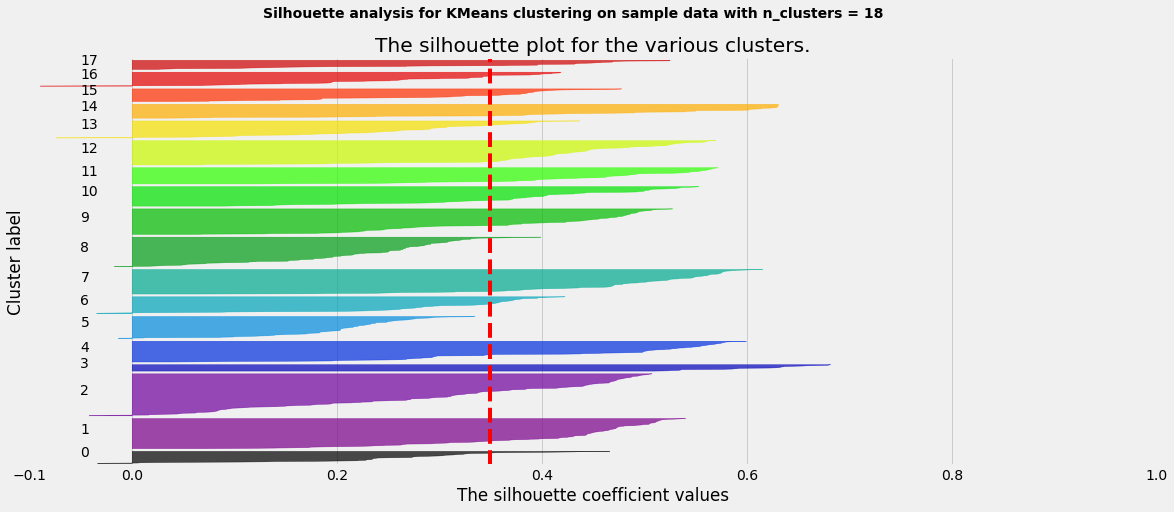

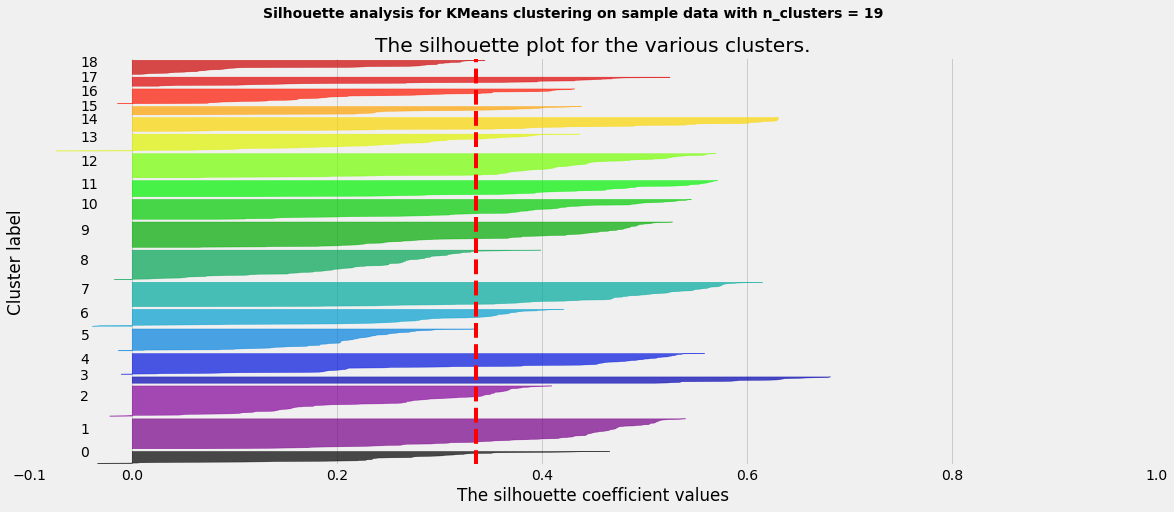

In [94]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = range(2, 20)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure()
    ax1 = fig.add_subplot()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [129]:
kmeansOpt = KMeans(
        init="k-means++",
        n_clusters=8,
        max_iter=300,
        random_state=42
)

In [146]:
kmeansOpt = KMeans(
        init="k-means++",
        n_clusters=19,
        n_init=10,
        max_iter=300,
        random_state=42
)

In [147]:
X_km = kmeansOpt.fit(X)

In [148]:
kmeansOpt.inertia_

18800.58818842937

In [149]:
labels = kmeansOpt.labels_
labels

array([11, 11, 11, ..., 10,  4,  4])

In [150]:
silhouette_score_average = silhouette_score(X, kmeansOpt.predict(X))
silhouette_score_average

0.33805399078658327

In [151]:
silhouette_score_individual = silhouette_samples(X, kmeansOpt.predict(X))

In [152]:
for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')

We have found a negative silhouette score: -0.030367375781569977
We have found a negative silhouette score: -0.021019971325324918
We have found a negative silhouette score: -0.014338482176448855
We have found a negative silhouette score: -0.008550340600400936
We have found a negative silhouette score: -0.022060459618453272
We have found a negative silhouette score: -0.017558842284127196
We have found a negative silhouette score: -0.012676068236479706
We have found a negative silhouette score: -0.013545407005188297
We have found a negative silhouette score: -0.02229843105954694
We have found a negative silhouette score: -0.026004545503564156
We have found a negative silhouette score: -0.020022671138910392
We have found a negative silhouette score: -0.049572102786592326
We have found a negative silhouette score: -0.05588287046856982
We have found a negative silhouette score: -0.002047428231934278
We have found a negative silhouette score: -0.004134279194166658
We have found a negative si

In [136]:
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,20)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    model.fit(X)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(X, model.predict(X))


    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')

 This Many Clusters: 4 | Number of Negative Values: 2
 This Many Clusters: 6 | Number of Negative Values: 1
 This Many Clusters: 7 | Number of Negative Values: 1
 This Many Clusters: 9 | Number of Negative Values: 2
 This Many Clusters: 10 | Number of Negative Values: 3
 This Many Clusters: 11 | Number of Negative Values: 7
 This Many Clusters: 12 | Number of Negative Values: 1
 This Many Clusters: 13 | Number of Negative Values: 5
 This Many Clusters: 14 | Number of Negative Values: 9
 This Many Clusters: 15 | Number of Negative Values: 14
 This Many Clusters: 16 | Number of Negative Values: 6
 This Many Clusters: 17 | Number of Negative Values: 12
 This Many Clusters: 18 | Number of Negative Values: 10
 This Many Clusters: 19 | Number of Negative Values: 22


In [153]:
df2['Label'] = le.fit_transform(df2['Label'])

In [154]:
df2['cluster_label'] = kmeansOpt.labels_

In [36]:
from scipy.spatial import distance

In [177]:
def nearest(product_index, cluster_points, cluster_no):
    distances = []
    #centroid = kmeansOpt.cluster_centers_[cluster_no]
    #prod_dist = distance.euclidean(X.loc[product_index], centroid)
    given_point = X.loc[product_index]
    for point in cluster_points:
        if point != product_index:
            dist = distance.euclidean(X.loc[point], given_point)
            distances.append((point, dist))
    distances.sort(key=lambda x: x[1])
    if(len(distances) < 5):
        return distances
    else: return distances[:5]

In [240]:
def recommendations(product_name):

    product_index = df[df['name'] == product_name].index[0]
    
    cluster_label = df2.loc[product_index, 'cluster_label']
    cluster_points = df2[df2['cluster_label'] == cluster_label].index

    # Extract the nearest points (excluding the user chosen product itself)
    nearest_points = nearest(product_index, cluster_points, cluster_label)

    label = df.loc[product_index, 'Label'] 
    brand = df.loc[product_index, 'brand']
    price = df.loc[product_index, 'price']
    rank = df.loc[product_index, 'rank']
    skintype = df.loc[product_index, 'skintype'] 

    #Print the 5 nearest points in the same cluster to the user chosen product
    print(f"Products similar to '{product_name} ({label}, {brand}, {price}$, {rank}, [{skintype}])':")

    recommended_products = []

    for point in nearest_points:
        product_label = df.loc[point[0], 'Label'] 
        product_brand = df.loc[point[0], 'brand']
        product_price = df.loc[point[0], 'price']
        product_rank = df.loc[point[0], 'rank']
        product_title = df.loc[point[0], 'name']
        product_skintype = df.loc[point[0], 'skintype']
        distance = round(point[1], 2)
        recommended_products.append((product_title, product_label, product_brand, product_price, product_rank, product_skintype, distance))

    for product in recommended_products:
        print(f'--{product[0]} ({product[1]}, {product[2]}, {product[3]}$ , {product[4]}, [{product[5]}]), Distance: {product[6]}')
        

In [261]:
def recommendations_kmeans(products_list):
    all_nearest = [] #5 nearest points of every product in list
    print("Products similar to: ")
    for product in products_list:
        product_index = df[df['name'] == product].index[0]
        cluster_label = df2.loc[product_index, 'cluster_label']
        cluster_points = df2[df2['cluster_label'] == cluster_label].index
        
        label = df.loc[product_index, 'Label'] 
        brand = df.loc[product_index, 'brand']
        price = df.loc[product_index, 'price']
        rank = df.loc[product_index, 'rank']
        skintype = df.loc[product_index, 'skintype'] 
        print(f"{product} ({label}, {brand}, {price}£, {rank}, [{skintype}])")

        # Extract the nearest points (excluding the user chosen product itself)
        nearest_points = nearest(product_index, cluster_points, cluster_label)
        for point in nearest_points:
            all_nearest.append(point)
    all_nearest.sort(key=lambda x: x[1])
    
    nearest_ten = []
    if(len(all_nearest) < 10): 
        nearest_ten = all_nearest
    else: nearest_ten = all_nearest[:10]
    recommended_products = []
    recommended_products_names = []
    for point in nearest_ten: 
        product_label = df.loc[point[0], 'Label'] 
        product_brand = df.loc[point[0], 'brand']
        product_price = df.loc[point[0], 'price']
        product_rank = df.loc[point[0], 'rank']
        product_title = df.loc[point[0], 'name']
        product_skintype = df.loc[point[0], 'skintype']
        distance = round(point[1],4)
        recommended_products.append((product_title, product_label, product_brand, product_price, product_rank, product_skintype, distance))
        recommended_products_names.append(product_title)
    for product in recommended_products:
        print(f'--{product[0]} ({product[1]}, {product[2]}, {product[3]}$, {product[4]}, [{product[5]}]), Distance: {product[6]}')
    return recommended_products_names

In [253]:
recommendations_kmeans(["Treatment Cleansing Foam", "Rejuvenating Serum", "The Moisturizing Soft Cream"])

Products similar to: 
Treatment Cleansing Foam (Cleanser, AMOREPACIFIC, 50£, 4.5, [C,N,O])
Rejuvenating Serum (Treatment, TATA HARPER, 110£, 3.7, [C,D,N,O,S])
The Moisturizing Soft Cream (Moisturizer, LA MER, 175£, 3.8, [C,D,N,O,S])
--The Renewal Oil Mini (Moisturizer, LA MER, 130$, 4.0, [C,D,N,O,S]), Distance: 0.25
--The Moisturizing Soft Lotion (Moisturizer, LA MER, 270$, 3.6, [C,D,N,O,S]), Distance: 0.26
--The Renewal Oil (Moisturizer, LA MER, 245$, 4.2, [C,D,N,O,S]), Distance: 0.3
--Resurfacing Serum (Treatment, TATA HARPER, 88$, 4.2, [C,D,N,O,S]), Distance: 0.33
--Treatment Lotion Hydrating Mask (Face Mask, LA MER, 150$, 4.1, [C,D,N,O,S]), Distance: 1.05
--The Moisturizing Matte Lotion (Moisturizer, LA MER, 270$, 3.9, [N,O]), Distance: 1.76
--Treatment Enzyme Peel (Cleanser, AMOREPACIFIC, 60$, 4.7, [C,D,N,O,S]), Distance: 2.15
--GENIUS Ultimate Anti-Aging Melting Cleanser (Cleanser, ALGENIST, 38$, 4.1, [NO]), Distance: 2.45
--OIL OBSESSED™ Total Cleansing Oil (Cleanser, BAREMINERA

['The Renewal Oil Mini',
 'The Moisturizing Soft Lotion',
 'The Renewal Oil',
 'Resurfacing Serum',
 'Treatment Lotion Hydrating Mask',
 'The Moisturizing Matte Lotion',
 'Treatment Enzyme Peel',
 'GENIUS Ultimate Anti-Aging Melting Cleanser',
 'OIL OBSESSED™ Total Cleansing Oil',
 'Resurfacing Mask']

In [241]:
recommendations("Treatment Cleansing Foam")

Products similar to 'Treatment Cleansing Foam (Cleanser, AMOREPACIFIC, 50$, 4.5, [C,N,O])':
--Treatment Enzyme Peel (Cleanser, AMOREPACIFIC, 60$ , 4.7, [C,D,N,O,S]), Distance: 2.15
--GENIUS Ultimate Anti-Aging Melting Cleanser (Cleanser, ALGENIST, 38$ , 4.1, [NO]), Distance: 2.45
--OIL OBSESSED™ Total Cleansing Oil (Cleanser, BAREMINERALS, 30$ , 4.6, [C,D,N,O]), Distance: 2.85
--Multi-Perfecting Detoxifying Exfoliator (Cleanser, ALGENIST, 38$ , 4.6, [NO]), Distance: 3.14
--Treatment Toner (Moisturizer, AMOREPACIFIC, 50$ , 4.4, [C,D,N,O,S]), Distance: 3.61


In [238]:
rec = recommendations_kmeans(["Treatment Cleansing Foam"])

Products similar to: 
Treatment Cleansing Foam (Cleanser, AMOREPACIFIC, 50£, 4.5, [C,N,O])
--Treatment Enzyme Peel (Cleanser, AMOREPACIFIC, 60$, 4.7, [C,D,N,O,S]), Distance: 2.15
--GENIUS Ultimate Anti-Aging Melting Cleanser (Cleanser, ALGENIST, 38$, 4.1, [NO]), Distance: 2.45
--OIL OBSESSED™ Total Cleansing Oil (Cleanser, BAREMINERALS, 30$, 4.6, [C,D,N,O]), Distance: 2.85
--Multi-Perfecting Detoxifying Exfoliator (Cleanser, ALGENIST, 38$, 4.6, [NO]), Distance: 3.14
--Treatment Toner (Moisturizer, AMOREPACIFIC, 50$, 4.4, [C,D,N,O,S]), Distance: 3.61


In [242]:
recommendations("Hydrating Essence Toner")

Products similar to 'Hydrating Essence Toner (Cleanser, ALGENIST, 25$, 4.4, [NO])':
--GENIUS Ultimate Anti-Aging Eye Cream (Eye cream, ALGENIST, 74$ , 3.7, [NO]), Distance: 2.34
--Dark Circle Corrector Set (Eye cream, ALGENIST, 75$ , 4.3, [C,D,N,O,S]), Distance: 2.58
--Multi-Perfecting Detoxifying Exfoliator (Cleanser, ALGENIST, 38$ , 4.6, [NO]), Distance: 2.62
--Algae Brightening Mask (Face Mask, ALGENIST, 62$ , 0.0, [NO]), Distance: 3.1
--High Performance Continuous Moisture Eye Cream (Eye cream, ANTHONY, 38$ , 4.3, [NO]), Distance: 3.19


In [243]:
recommendations("Sheer Mineral Sun Spray SPF 50")

Products similar to 'Sheer Mineral Sun Spray SPF 50 (Sun protect, DR. DENNIS GROSS SKINCARE, 42$, 4.1, [NO])':
--Clarifying Colloidal Sulfur Mask (Face Mask, DR. DENNIS GROSS SKINCARE, 42$ , 4.3, [NO]), Distance: 2.3
--Alpha Beta® Medi–Spa Peel (Treatment, DR. DENNIS GROSS SKINCARE, 64$ , 4.5, [C,D,N,O]), Distance: 2.41
--Doctor's Kit Gold Standard Anti-Aging Solution (Treatment, DR. DENNIS GROSS SKINCARE, 59$ , 5.0, [C,D,N,O,S]), Distance: 2.61
--One Essential City Defense SPF 50 (Sun protect, DIOR, 59$ , 4.3, [NO]), Distance: 3.13
--Mask Heroes Face Savers (Face Mask, DR. JART+, 36$ , 4.9, [C,D,N,O,S]), Distance: 3.29


In [244]:
recommendations("Rejuvenating Serum")

Products similar to 'Rejuvenating Serum (Treatment, TATA HARPER, 110$, 3.7, [C,D,N,O,S])':
--Resurfacing Serum (Treatment, TATA HARPER, 88$ , 4.2, [C,D,N,O,S]), Distance: 0.33
--Resurfacing Mask (Face Mask, TATA HARPER, 62$ , 4.3, [C,D,N,O,S]), Distance: 3.02
--Clarifying Mask (Face Mask, TATA HARPER, 68$ , 3.9, [C,D,N,O,S]), Distance: 3.05
--Everyday Sunscreen Broad Spectrum SPF 50 (Sun protect, SUPERGOOP!, 19$ , 4.3, [C,D,N,O]), Distance: 3.54
--Tarteguard 30 Vegan Sunscreen Lotion Broad Spectrum SPF 30 (Sun protect, TARTE, 32$ , 3.7, [C,D,N,O,S]), Distance: 3.86


In [245]:
recommendations("The Moisturizing Soft Cream")

Products similar to 'The Moisturizing Soft Cream (Moisturizer, LA MER, 175$, 3.8, [C,D,N,O,S])':
--The Renewal Oil Mini (Moisturizer, LA MER, 130$ , 4.0, [C,D,N,O,S]), Distance: 0.25
--The Moisturizing Soft Lotion (Moisturizer, LA MER, 270$ , 3.6, [C,D,N,O,S]), Distance: 0.26
--The Renewal Oil (Moisturizer, LA MER, 245$ , 4.2, [C,D,N,O,S]), Distance: 0.3
--Treatment Lotion Hydrating Mask (Face Mask, LA MER, 150$ , 4.1, [C,D,N,O,S]), Distance: 1.05
--The Moisturizing Matte Lotion (Moisturizer, LA MER, 270$ , 3.9, [N,O]), Distance: 1.76


In [246]:
recommendations("PERFECT Clarifying Pore Corrector Mask")

Products similar to 'PERFECT Clarifying Pore Corrector Mask (Face Mask, ALGENIST, 55$, 4.5, [NO])':
--Deep Pore Cleansing Clay (Face Mask, ANTHONY, 24$ , 4.4, [NO]), Distance: 2.82
--REVEAL Concentrated Color Correcting Drops (Treatment, ALGENIST, 38$ , 3.8, [NO]), Distance: 3.26
--COMPLEXION RESCUE™ Tinted Moisturizer Broad Spectrum SPF 30 (Moisturizer, BAREMINERALS, 30$ , 3.9, [NO]), Distance: 3.32
--Natural Protector Broad Spectrum SPF 35 Sunscreen (Sun protect, AMOREPACIFIC, 65$ , 4.0, [C,D,N,O,S]), Distance: 3.58
--Prime Time BB Tinted Primer Broad Spectrum SPF 30 (Moisturizer, BAREMINERALS, 27$ , 4.1, [NO]), Distance: 3.59


In [247]:
recommendations("Intensive Vitalizing Eye Essence")

Products similar to 'Intensive Vitalizing Eye Essence (Eye cream, AMOREPACIFIC, 95$, 3.9, [C,D,N,O,S])':
--MOISTURE BOUND Rejuvenating Eye Treatment Gel (Eye cream, AMOREPACIFIC, 85$ , 4.3, [C,D,N,O,S]), Distance: 0.51
--TIME RESPONSE Eye Reserve Crème (Eye cream, AMOREPACIFIC, 260$ , 5.0, [C,D,N,O]), Distance: 1.14
--TIME RESPONSE Vintage Wash-off Masque (Face Mask, AMOREPACIFIC, 170$ , 5.0, [C,D,N,O]), Distance: 1.45
--MOISTURE BOUND Sleeping Recovery Mask (Face Mask, AMOREPACIFIC, 60$ , 4.3, [C,D,N,S]), Distance: 1.51
--SPLASH Absolute Hydration Replenishing Sleeping Pack (Face Mask, ALGENIST, 48$ , 3.6, [C,D,N,O,S]), Distance: 1.9


In [206]:
recommendations("Prismatic Luminizing Shield SPF 50")

Products similar to 'Prismatic Luminizing Shield SPF 50 (Sun protect, VOLITION BEAUTY, 35$, 4.2, [C,D,N,O,S])':
Adaptogen Deep Moisture Cream (Moisturizer, YOUTH TO THE PEOPLE, 58$ , 4.8, [C,D,N,O,S]), Distance: 2.703441759553103
Snow Mushroom Water Serum (Treatment, VOLITION BEAUTY, 62$ , 4.7, [C,D,N,O,S]), Distance: 2.8687047719993366
Superberry Hydrate + Glow Oil (Moisturizer, YOUTH TO THE PEOPLE, 44$ , 4.8, [C,D,N,S]), Distance: 3.0750530179457862
Superfood Firm and Brighten Vitamin C Serum (Treatment, YOUTH TO THE PEOPLE, 62$ , 3.9, [C,D,N,O,S]), Distance: 3.480878637803948
Helix AM/PM Eye Gel (Eye cream, VOLITION BEAUTY, 52$ , 3.9, [C,D,N,O]), Distance: 3.5438459376592375


In [207]:
recommendations('ELEVATE Advanced Retinol Serum')

Products similar to 'ELEVATE Advanced Retinol Serum (Treatment, ALGENIST, 98$, 4.8, [C,D,N])':
POWER Advanced Wrinkle Fighter 360° Eye Serum (Treatment, ALGENIST, 70$ , 4.1, [C,D,N,O,S]), Distance: 1.452564788466206
Concentrated Reconstructing Serum (Treatment, ALGENIST, 98$ , 4.2, [NO]), Distance: 1.8185982605271025
Pore Corrector Anti-Aging Primer (Treatment, ALGENIST, 42$ , 4.4, [C,D,N,O,S]), Distance: 2.1647960939342132
GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118$ , 3.9, [C,D,N,O,S]), Distance: 2.388886541943493
Targeted Deep Wrinkle Minimizer (Treatment, ALGENIST, 45$ , 3.6, [NO]), Distance: 2.4025349679162304


In [209]:
recommendations('GENIUS Liquid Collagen')

Products similar to 'GENIUS Liquid Collagen (Treatment, ALGENIST, 115$, 4.0, [C,D,N,O,S])':
GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118$ , 3.9, [C,D,N,O,S]), Distance: 1.1465066751621613
Pore Corrector Anti-Aging Primer (Treatment, ALGENIST, 42$ , 4.4, [C,D,N,O,S]), Distance: 1.4873999091511343
FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$ , 4.2, [C,D,N,O,S]), Distance: 1.5251714870818327
ELEVATE Advanced Lift Contouring Cream (Treatment, ALGENIST, 96$ , 4.3, [C,D,N,O,S]), Distance: 2.0667923761769607
MOISTURE BOUND Rejuvenating Serum (Treatment, AMOREPACIFIC, 100$ , 4.4, [C,D,N,S]), Distance: 2.130487798267139


In [250]:
recommendations('Bio-Performance LiftDynamic Serum')

Products similar to 'Bio-Performance LiftDynamic Serum (Treatment, SHISEIDO, 98$, 3.9, [NO])':
--Bio-Performance Glow Revival Serum (Treatment, SHISEIDO, 92$ , 4.3, [NO]), Distance: 0.16
--Ultimate Sun Protection Cream Broad Spectrum SPF 50+ Wetforce For Face (Sun protect, SHISEIDO, 36$ , 4.1, [NO]), Distance: 1.36
--Bio-Performance Advanced Super Restoring Cream (Moisturizer, SHISEIDO, 127$ , 4.3, [NO]), Distance: 2.0
--Bio-Performance Glow Revival Cream (Moisturizer, SHISEIDO, 105$ , 4.8, [NO]), Distance: 2.01
--Benefiance WrinkleResist24 Night Emulsion (Moisturizer, SHISEIDO, 63$ , 4.3, [NO]), Distance: 2.02


In [251]:
recommendations('Find Your Balance™ Oil Control Cleanser')

Products similar to 'Find Your Balance™ Oil Control Cleanser (Cleanser, OLEHENRIKSEN, 25$, 4.5, [C,O])':
--Pore-Balance™ Facial Sauna Scrub (Cleanser, OLEHENRIKSEN, 28$ , 4.6, [C,O]), Distance: 0.32
--Balancing Force™ Oil Control Toner (Cleanser, OLEHENRIKSEN, 26$ , 4.4, [C,D,N,O,S]), Distance: 1.74
--Reviving Eye Cream (Eye cream, OMOROVICZA, 145$ , 3.8, [NO]), Distance: 2.29
--Stay Balanced™ Oil Control Cleansing Cloths (Cleanser, OLEHENRIKSEN, 8$ , 4.5, [C,O]), Distance: 2.58
--Face the Truth™ Gel Cleanser (Cleanser, OLEHENRIKSEN, 24$ , 4.5, [C,D,N,O,S]), Distance: 2.97


In [191]:
recommendations('Moment of Truth™ 2-in-1 Polishing Sugar Mask')

Products similar to 'Moment of Truth™ 2-in-1 Polishing Sugar Mask (Cleanser, OLEHENRIKSEN, 42$, 4.5, [C,D,N,O,S])':
Truth™ On the Glow Cleansing Cloths (Cleanser, OLEHENRIKSEN, 15$ , 4.2, [C,D,N,O,S]), Distance: 0.8639372869061642
Wonderfeel™ Double Cleanser (Cleanser, OLEHENRIKSEN, 32$ , 4.4, [C,D,N,O,S]), Distance: 0.8680345348598609
The Clean Truth™ Foaming Cleanser (Cleanser, OLEHENRIKSEN, 30$ , 4.4, [C,D,N,O,S]), Distance: 0.894943427563867
Face the Truth™ Gel Cleanser (Cleanser, OLEHENRIKSEN, 24$ , 4.5, [C,D,N,O,S]), Distance: 1.3550083975954652
Transforming Walnut Scrub (Cleanser, OLEHENRIKSEN, 28$ , 4.7, [C,D,N,O,S]), Distance: 1.4446078891171414


Preporuke proizvoda iz iste linije

In [192]:
recommendations('FUTURE RESPONSE Age Defense Creme SPF 30')

Products similar to 'FUTURE RESPONSE Age Defense Creme SPF 30 (Sun protect, AMOREPACIFIC, 195$, 3.8, [C,D,N,O,S])':
ELEVATE Advanced Lift Contouring Cream (Treatment, ALGENIST, 96$ , 4.3, [C,D,N,O,S]), Distance: 1.5297122807081984
POWER Recharging Night Pressed Serum (Moisturizer, ALGENIST, 95$ , 4.4, [C,D,N,O,S]), Distance: 1.6401103856254509
Resort Collection Sun Protection Mist Broad Spectrum SPF 30 Sunscreen (Sun protect, AMOREPACIFIC, 32$ , 3.3, [C,D,N,O,S]), Distance: 1.6878831281674047
FUTURE RESPONSE Age Defense Creme (Moisturizer, AMOREPACIFIC, 195$ , 4.4, [C,D,N,O,S]), Distance: 1.7273533742464906
FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$ , 4.2, [C,D,N,O,S]), Distance: 1.7812198021234504


In [193]:
recommendations('Tarteguard Mineral Powder Sunscreen Broad Spectrum SPF 30')

Products similar to 'Tarteguard Mineral Powder Sunscreen Broad Spectrum SPF 30 (Sun protect, TARTE, 28$, 4.2, [C,D,N,O,S])':
Invincible Setting Powder SPF 45 Refill (Sun protect, SUPERGOOP!, 20$ , 5.0, [C,D,N,O,S]), Distance: 1.0577397246433144
City Sunscreen Serum SPF 30 (Sun protect, SUPERGOOP!, 42$ , 4.1, [C,D,N,O]), Distance: 1.4703666499671944
BB Tinted Treatment 12-Hour Primer Broad Spectrum SPF 30 Sunscreen (Moisturizer, TARTE, 37$ , 4.3, [C,D,N,O]), Distance: 1.542855147086648
Drink of H2O Hydrating Boost Moisturizer Rainforest of the Sea™ (Moisturizer, TARTE, 39$ , 4.4, [C,D,N,O,S]), Distance: 1.7676320128397165
Unseen Sunscreen Broad Spectrum SPF 40 (Sun protect, SUPERGOOP!, 32$ , 4.5, [C,D,N,O]), Distance: 1.9545971173964831


In [164]:
from sklearn.metrics.pairwise import cosine_similarity

In [165]:
cosine_sim = cosine_similarity(X, X)

In [166]:
df3 = df.copy()

In [167]:
df3.set_index('name', inplace = True)
df3.head()

,Label,brand,price,rank,Combination,Dry,Normal,Oily,Sensitive,ingredients,skintype
name,,,,,,,,,,,
GENIUS Ultimate Anti-Aging Melting Cleanser,Cleanser,ALGENIST,38,4.1,0,0,0,0,0,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat...",NO
Hydrating Essence Toner,Cleanser,ALGENIST,25,4.4,0,0,0,0,0,"['water', 'butylene glycol', 'sodium pca', 'wa...",NO
Multi-Perfecting Detoxifying Exfoliator,Cleanser,ALGENIST,38,4.6,0,0,0,0,0,"['water', 'caprylic/capric triglyceride', 'hyd...",NO
Treatment Cleansing Foam,Cleanser,AMOREPACIFIC,50,4.5,1,0,1,1,0,"['water', 'glycerin', 'stearic acid', 'myristi...","C,N,O"
Treatment Enzyme Peel,Cleanser,AMOREPACIFIC,60,4.7,1,1,1,1,1,"['mannitol', 'sodium cocoyl glycinate', 'sodiu...","C,D,N,O,S"


In [168]:
indices = pd.Series(df3.index)
indices[:5]

0    GENIUS Ultimate Anti-Aging Melting Cleanser
1                        Hydrating Essence Toner
2        Multi-Perfecting Detoxifying Exfoliator
3                       Treatment Cleansing Foam
4                          Treatment Enzyme Peel
Name: name, dtype: object

In [262]:
def recommendations_cossim(name,n=5,cosine_sim = cosine_sim):
    recommended_products = []
    
    #get index of the product that matches the name
    idx = indices[indices == name].index[0]

    label = df.loc[idx, 'Label'] 
    brand = df.loc[idx, 'brand']
    price = df.loc[idx, 'price']
    rank = df.loc[idx, 'rank']
    skintype = df.loc[idx, 'skintype'] 

    #Print the 5 nearest points in the same cluster to the user chosen product
    print(f"Products similar to '{name} ({label}, {brand}, {price}$, {rank}, [{skintype}])':")
    
    #find highest cosine_sim this title shares with other titles extracted earlier and save it in a Series
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    #get indexes of the 'n' most similar products
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    #print(top_n_indexes)
    recommended_products_names = []
    #populating the list with titles of n matching products
    for i in top_n_indexes:
        product_label = df['Label'].iloc[i] 
        product_brand = df['brand'].iloc[i]
        product_price = df['price'].iloc[i]
        product_rank = df['rank'].iloc[i]
        product_title = list(df3.index)[i]
        product_skintype = df['skintype'].iloc[i]
        distance = round(score_series.iloc[i],4)
        recommended_products.append((product_title, product_label, product_brand, product_price, product_rank, product_skintype, distance))
        recommended_products_names.append(product_title)
    
    for product in recommended_products:
         print(f'--{product[0]} ({product[1]}, {product[2]}, {product[3]}$, {product[4]}, [{product[5]}]), Cosine similarity: {product[6]}')
        #recommended_products.append(list(df.index)[i])
    return recommended_products_names

In [203]:
recommendations_cossim('Find Your Balance™ Oil Control Cleanser')

Products similar to 'Find Your Balance™ Oil Control Cleanser (Cleanser, OLEHENRIKSEN, 25$, 4.5, [C,O])':
Pore-Balance™ Facial Sauna Scrub (Cleanser, OLEHENRIKSEN, 28$, 4.6, [C,O]), Cosine similarity: 0.9988030374018815
Balancing Force™ Oil Control Toner (Cleanser, OLEHENRIKSEN, 26$, 4.4, [C,D,N,O,S]), Cosine similarity: 0.998818334245029
Purity Made Simple One-Step Facial Cleansing Cloths (Cleanser, PHILOSOPHY, 15$, 3.9, [NO]), Cosine similarity: 0.9986966685627975
Irish Moor Mud Purifying Cleanser Gel (Cleanser, PETER THOMAS ROTH, 38$, 4.3, [NO]), Cosine similarity: 0.9987188392190929
Anti-Aging Cleansing Gel (Cleanser, PETER THOMAS ROTH, 38$, 4.4, [NO]), Cosine similarity: 0.9987258609562916


['Pore-Balance™ Facial Sauna Scrub',
 'Balancing Force™ Oil Control Toner',
 'Purity Made Simple One-Step Facial Cleansing Cloths',
 'Irish Moor Mud Purifying Cleanser Gel',
 'Anti-Aging Cleansing Gel']

In [202]:
recommendations_cossim('FUTURE RESPONSE Age Defense Creme SPF 30')

Products similar to 'FUTURE RESPONSE Age Defense Creme SPF 30 (Sun protect, AMOREPACIFIC, 195$, 3.8, [C,D,N,O,S])':
ELEVATE Advanced Lift Contouring Cream (Treatment, ALGENIST, 96$, 4.3, [C,D,N,O,S]), Cosine similarity: 0.20150440719115184
FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$, 4.2, [C,D,N,O,S]), Cosine similarity: 0.20058729972675535
Resort Collection Sun Protection Mist Broad Spectrum SPF 30 Sunscreen (Sun protect, AMOREPACIFIC, 32$, 3.3, [C,D,N,O,S]), Cosine similarity: 0.2148141723709826
POWER Recharging Night Pressed Serum (Moisturizer, ALGENIST, 95$, 4.4, [C,D,N,O,S]), Cosine similarity: 0.23141639469622557
MOISTURE BOUND Tinted Treatment Moisturizer SPF 15 (Sun protect, AMOREPACIFIC, 70$, 4.2, [C,D,N,S]), Cosine similarity: 0.2150198896689495


['ELEVATE Advanced Lift Contouring Cream',
 'FUTURE RESPONSE Age Defense Serum',
 'Resort Collection Sun Protection Mist Broad Spectrum SPF 30 Sunscreen',
 'POWER Recharging Night Pressed Serum',
 'MOISTURE BOUND Tinted Treatment Moisturizer SPF 15']

In [224]:
def compare_recommendations(method1, method2, product):
    recommended_products_1 = method1([product])
    print("-----------------------------")
    recommended_products_2 = method2(product)

    common_products = set(recommended_products_1).intersection(recommended_products_2)
    num_common_products = len(common_products)

    # Calculate overlap percentage
    total_products = 5
    #len(recommended_products_1) + len(recommended_products_2) - num_common_products
    overlap_percentage = (num_common_products / total_products) * 100

    return overlap_percentage


In [263]:
overlap_percentage = compare_recommendations(recommendations_kmeans, recommendations_cossim, 'GENIUS Liquid Collagen')
print(f"\nOverlap percentage: {overlap_percentage}%")

Products similar to: 
GENIUS Liquid Collagen (Treatment, ALGENIST, 115£, 4.0, [C,D,N,O,S])
--GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118$, 3.9, [C,D,N,O,S]), Distance: 1.1465
--Pore Corrector Anti-Aging Primer (Treatment, ALGENIST, 42$, 4.4, [C,D,N,O,S]), Distance: 1.4874
--FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$, 4.2, [C,D,N,O,S]), Distance: 1.5252
--ELEVATE Advanced Lift Contouring Cream (Treatment, ALGENIST, 96$, 4.3, [C,D,N,O,S]), Distance: 2.0668
--MOISTURE BOUND Rejuvenating Serum (Treatment, AMOREPACIFIC, 100$, 4.4, [C,D,N,S]), Distance: 2.1305
-----------------------------
Products similar to 'GENIUS Liquid Collagen (Treatment, ALGENIST, 115$, 4.0, [C,D,N,O,S])':
--GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118$, 3.9, [C,D,N,O,S]), Cosine similarity: 0.0229
--FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$, 4.2, [C,D,N,O,S]), Cosine similarity: 0.0224
--Pore Corrector Anti-Aging Primer (T

In [264]:
overlap_percentage = compare_recommendations(recommendations_kmeans, recommendations_cossim, 'Find Your Balance™ Oil Control Cleanser')
print(f"\nOverlap percentage: {overlap_percentage}%")

Products similar to: 
Find Your Balance™ Oil Control Cleanser (Cleanser, OLEHENRIKSEN, 25£, 4.5, [C,O])
--Pore-Balance™ Facial Sauna Scrub (Cleanser, OLEHENRIKSEN, 28$, 4.6, [C,O]), Distance: 0.3165
--Balancing Force™ Oil Control Toner (Cleanser, OLEHENRIKSEN, 26$, 4.4, [C,D,N,O,S]), Distance: 1.7403
--Reviving Eye Cream (Eye cream, OMOROVICZA, 145$, 3.8, [NO]), Distance: 2.29
--Stay Balanced™ Oil Control Cleansing Cloths (Cleanser, OLEHENRIKSEN, 8$, 4.5, [C,O]), Distance: 2.5843
--Face the Truth™ Gel Cleanser (Cleanser, OLEHENRIKSEN, 24$, 4.5, [C,D,N,O,S]), Distance: 2.9693
-----------------------------
Products similar to 'Find Your Balance™ Oil Control Cleanser (Cleanser, OLEHENRIKSEN, 25$, 4.5, [C,O])':
--Pore-Balance™ Facial Sauna Scrub (Cleanser, OLEHENRIKSEN, 28$, 4.6, [C,O]), Cosine similarity: 0.9988
--Balancing Force™ Oil Control Toner (Cleanser, OLEHENRIKSEN, 26$, 4.4, [C,D,N,O,S]), Cosine similarity: 0.9988
--Purity Made Simple One-Step Facial Cleansing Cloths (Cleanser, PH

In [265]:
overlap_percentage = compare_recommendations(recommendations_kmeans, recommendations_cossim, 'The Moisturizing Soft Cream')
print(f"\nOverlap percentage: {overlap_percentage}%")

Products similar to: 
The Moisturizing Soft Cream (Moisturizer, LA MER, 175£, 3.8, [C,D,N,O,S])
--The Renewal Oil Mini (Moisturizer, LA MER, 130$, 4.0, [C,D,N,O,S]), Distance: 0.2472
--The Moisturizing Soft Lotion (Moisturizer, LA MER, 270$, 3.6, [C,D,N,O,S]), Distance: 0.2641
--The Renewal Oil (Moisturizer, LA MER, 245$, 4.2, [C,D,N,O,S]), Distance: 0.2954
--Treatment Lotion Hydrating Mask (Face Mask, LA MER, 150$, 4.1, [C,D,N,O,S]), Distance: 1.0459
--The Moisturizing Matte Lotion (Moisturizer, LA MER, 270$, 3.9, [N,O]), Distance: 1.7563
-----------------------------
Products similar to 'The Moisturizing Soft Cream (Moisturizer, LA MER, 175$, 3.8, [C,D,N,O,S])':
--The Renewal Oil Mini (Moisturizer, LA MER, 130$, 4.0, [C,D,N,O,S]), Cosine similarity: 0.987
--The Moisturizing Soft Lotion (Moisturizer, LA MER, 270$, 3.6, [C,D,N,O,S]), Cosine similarity: 0.987
--The Renewal Oil (Moisturizer, LA MER, 245$, 4.2, [C,D,N,O,S]), Cosine similarity: 0.987
--Treatment Lotion Hydrating Mask (Face

In [266]:
overlap_percentage = compare_recommendations(recommendations_kmeans, recommendations_cossim, 'Bio-Performance LiftDynamic Serum')
print(f"\nOverlap percentage: {overlap_percentage}%")

Products similar to: 
Bio-Performance LiftDynamic Serum (Treatment, SHISEIDO, 98£, 3.9, [NO])
--Bio-Performance Glow Revival Serum (Treatment, SHISEIDO, 92$, 4.3, [NO]), Distance: 0.1634
--Ultimate Sun Protection Cream Broad Spectrum SPF 50+ Wetforce For Face (Sun protect, SHISEIDO, 36$, 4.1, [NO]), Distance: 1.3607
--Bio-Performance Advanced Super Restoring Cream (Moisturizer, SHISEIDO, 127$, 4.3, [NO]), Distance: 2.0036
--Bio-Performance Glow Revival Cream (Moisturizer, SHISEIDO, 105$, 4.8, [NO]), Distance: 2.0088
--Benefiance WrinkleResist24 Night Emulsion (Moisturizer, SHISEIDO, 63$, 4.3, [NO]), Distance: 2.0229
-----------------------------
Products similar to 'Bio-Performance LiftDynamic Serum (Treatment, SHISEIDO, 98$, 3.9, [NO])':
--Bio-Performance Glow Revival Serum (Treatment, SHISEIDO, 92$, 4.3, [NO]), Cosine similarity: 0.0555
--Ultimate Sun Protection Cream Broad Spectrum SPF 50+ Wetforce For Face (Sun protect, SHISEIDO, 36$, 4.1, [NO]), Cosine similarity: 0.9733
--Bio-Per

In [267]:
recommendations_cossim('GENIUS Liquid Collagen')

Products similar to 'GENIUS Liquid Collagen (Treatment, ALGENIST, 115$, 4.0, [C,D,N,O,S])':
--GENIUS Ultimate Anti-Aging Vitamin C+ Serum (Treatment, ALGENIST, 118$, 3.9, [C,D,N,O,S]), Cosine similarity: 0.0229
--FUTURE RESPONSE Age Defense Serum (Treatment, AMOREPACIFIC, 160$, 4.2, [C,D,N,O,S]), Cosine similarity: 0.0224
--Pore Corrector Anti-Aging Primer (Treatment, ALGENIST, 42$, 4.4, [C,D,N,O,S]), Cosine similarity: 0.0227
--ELEVATE Advanced Lift Contouring Cream (Treatment, ALGENIST, 96$, 4.3, [C,D,N,O,S]), Cosine similarity: 0.0236
--MOISTURE BOUND Rejuvenating Serum (Treatment, AMOREPACIFIC, 100$, 4.4, [C,D,N,S]), Cosine similarity: 0.0223


['GENIUS Ultimate Anti-Aging Vitamin C+ Serum',
 'FUTURE RESPONSE Age Defense Serum',
 'Pore Corrector Anti-Aging Primer',
 'ELEVATE Advanced Lift Contouring Cream',
 'MOISTURE BOUND Rejuvenating Serum']

In [208]:
recommendations_cossim('Bio-Performance LiftDynamic Serum')

Products similar to 'Bio-Performance LiftDynamic Serum (Treatment, SHISEIDO, 98$, 3.9, [NO])':
Bio-Performance Glow Revival Serum (Treatment, SHISEIDO, 92$, 4.3, [NO]), Cosine similarity: 0.055469926482529956
Ultimate Sun Protection Cream Broad Spectrum SPF 50+ Wetforce For Face (Sun protect, SHISEIDO, 36$, 4.1, [NO]), Cosine similarity: 0.9733203150109772
Bio-Performance Advanced Super Restoring Cream (Moisturizer, SHISEIDO, 127$, 4.3, [NO]), Cosine similarity: 0.989893433272049
Bio-Performance Glow Revival Cream (Moisturizer, SHISEIDO, 105$, 4.8, [NO]), Cosine similarity: 0.9898656387858152
Benefiance WrinkleResist24 Night Emulsion (Moisturizer, SHISEIDO, 63$, 4.3, [NO]), Cosine similarity: 0.9899243839215701


['Bio-Performance Glow Revival Serum',
 'Ultimate Sun Protection Cream Broad Spectrum SPF 50+ Wetforce For Face',
 'Bio-Performance Advanced Super Restoring Cream',
 'Bio-Performance Glow Revival Cream',
 'Benefiance WrinkleResist24 Night Emulsion']

In [211]:
recommendations_cossim("The Moisturizing Soft Cream")

Products similar to 'The Moisturizing Soft Cream (Moisturizer, LA MER, 175$, 3.8, [C,D,N,O,S])':
The Renewal Oil Mini (Moisturizer, LA MER, 130$, 4.0, [C,D,N,O,S]), Cosine similarity: 0.9869613552459389
The Moisturizing Soft Lotion (Moisturizer, LA MER, 270$, 3.6, [C,D,N,O,S]), Cosine similarity: 0.9869740364037259
The Renewal Oil (Moisturizer, LA MER, 245$, 4.2, [C,D,N,O,S]), Cosine similarity: 0.9869689115261419
Treatment Lotion Hydrating Mask (Face Mask, LA MER, 150$, 4.1, [C,D,N,O,S]), Cosine similarity: 0.9913142618416418
The Moisturizing Matte Lotion (Moisturizer, LA MER, 270$, 3.9, [N,O]), Cosine similarity: 0.9869881645685284


['The Renewal Oil Mini',
 'The Moisturizing Soft Lotion',
 'The Renewal Oil',
 'Treatment Lotion Hydrating Mask',
 'The Moisturizing Matte Lotion']